<a href="https://colab.research.google.com/github/manishshah7974/Plant_Disease_Detection/blob/main/VGG19_Code_for%20print.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Plant Disease Classification**






---



# **Importing Librabies**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [ ]:
import keras
import tensorflow
import tensorflow as tf
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import img_to_array , load_img
from keras.applications.vgg19 import VGG19, preprocess_input , decode_predictions

###**Accessing Dataset from Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###**Contents of Dataset**

In [ ]:
os.listdir("/content/drive/MyDrive/plant_village_dataset")

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Grape___Black_rot',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___Common_rust_',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___Esca_(Black_Measles)',
 'Grape___healthy',
 'Peach___Bacterial_spot',
 'Corn_(maize)___healthy',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___healthy',
 'Potato___Late_blight',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Tomato___Leaf_Mold',
 'Tomato___Target_Spot',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Septoria_leaf_spot',
 'Tomato___L

### **Constant**

In [ ]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

#**Preprocessing Data**

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/plant_village_dataset",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE) ,
    batch_size = BATCH_SIZE
)


Found 54635 files belonging to 38 classes.


## **Visualize some of the images from our dataset**

In [ ]:
class_names = dataset.class_names

In [ ]:
plt.figure(figsize=(15,15))
for image_batch , label_batch in dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_names[label_batch[i]])
    plt.axis("off")

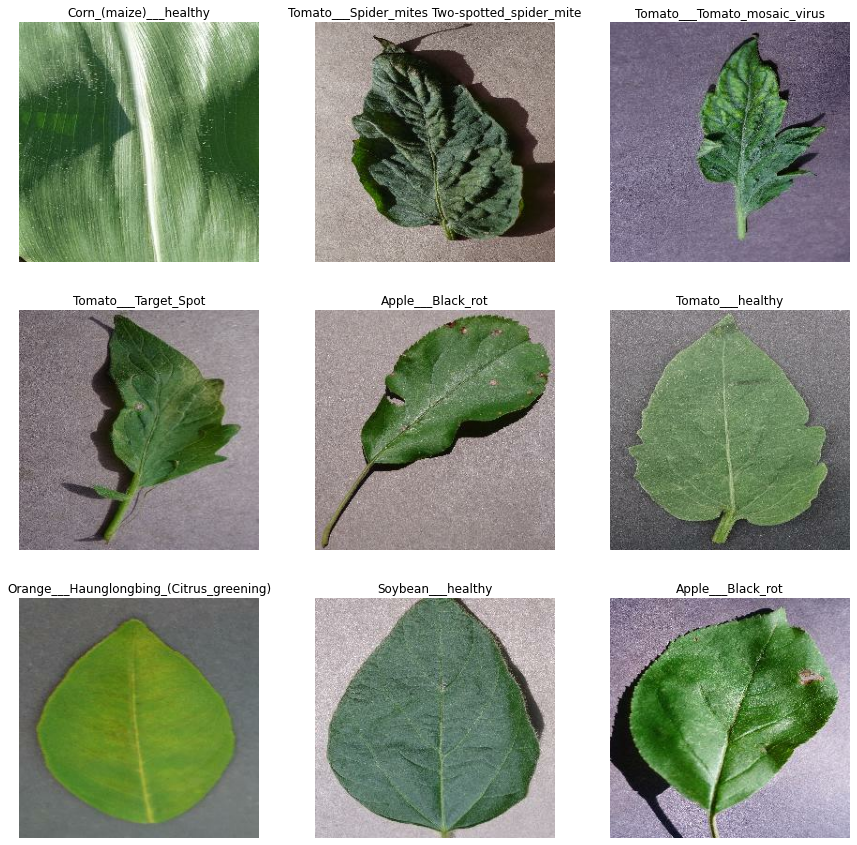

# **Preprocessed Images**

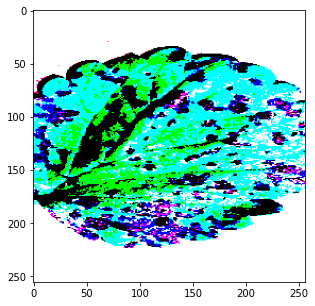

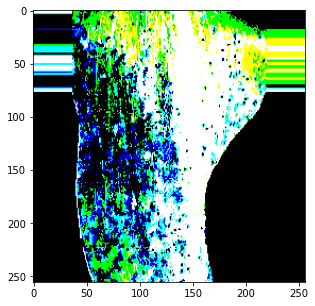

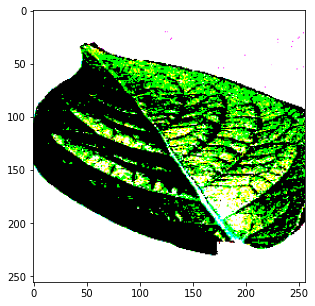

In [ ]:
t_img,label = train.next()
def plotImage(img_arr, label):
   for im, l in zip(img_arr , label):
    plt.figure(figsize=(5,5))
    plt.imshow(im)
    plt.show()
plotImage(t_img[:3], label[:3])


# **Split the Dataset**

Training: Dataset to be used while training (80%) <br>
Validation: Dataset to be tested against while training (10%) <br>
Test: Dataset to be tested against after we trained a model (10%)

In [ ]:
def get_dataset_partitions_tf(ds,train_split=0.8 , val_split = 0.1 , test_split = 0.1 ,shuffle=True, shuffle_size=10000):
  ds_size=len(ds)
  if shuffle:
    ds = ds.shuffle(shuffle_size, seed=12)
  train_size = int(train_split * ds_size)
  val_size = int(val_split * ds_size)
  train_ds = ds.take(train_size)
  val_ds=ds.skip(train_size).take(val_size)
  test_ds=ds.skip(train_size).skip(val_size)

  return train_ds , val_ds , test_ds

Each Set is a batch of 32 images of size (256,256)

In [ ]:
train_datagen =ImageDataGenerator(zoom_range= 0.5, shear_range= 0.3, horizontal_flip= True, preprocessing_function= preprocess_input )
val_datagen =ImageDataGenerator(preprocessing_function= preprocess_input )
train = train_datagen.flow_from_directory(directory= "/content/drive/MyDrive/plant_village_dataset/Train",
                                           target_size= (256,256),
                                           batch_size=32)
val = val_datagen.flow_from_directory(directory= "/content/drive/MyDrive/plant_village_dataset/Validation",
                                           target_size= (256,256),
                                           batch_size=32)
train_ds = train_generator.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = validation_generator.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_generator.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)


#**Building the Model**

VGG19 consists of 19 layers (16 convolution layers, 3 Fully connected layer, 5 MaxPool layers and 1 SoftMax layer) <br>
There are other variants of VGG like VGG11, VGG16 and others.<br> VGG19 has 19.6 billion FLOPs.

In [ ]:
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
import keras

In [ ]:
base_model = VGG19(input_shape=(256,256,3), include_top= False)

80134624/80134624 [==============================] - 1s 0us/step


In [ ]:
for layer in base_model.layers:
 layer.trainable = False

In [ ]:
X = Flatten()(base_model.output)

X = Dense(units= 38, activation="softmax")(X)

#Creating our model
model = Model(base_model. input, X)

## **Model Summary**

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     



---



---



# **Early Stopping & Model Check Points**

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
#Early stopping
es = EarlyStopping(monitor= 'val_accuracy', min_delta= 0.01, patience= 3, verbose=1)
# model check point
mc = ModelCheckpoint(filepath="best_model.h5",monitor='val_accuracy', min_delta= 0.01, patience= 3, verbose=1, save_best_only=True)
cb=[es,mc]

# **Compiling the Model** <br>
###We use adam Optimizer, SparseCategoricalCrossentropy for losses, accuracy as a metric

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

# **Training the Model**

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=50,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=50,
)

Epoch 1/50
50/50 [==============================] - 513s 10s/step - loss: 2.7324 - accuracy: 0.4531 - val_loss: 0.9916 - val_accuracy: 0.6927
Epoch 2/50
50/50 [==============================] - 464s 9s/step - loss: 0.9110 - accuracy: 0.7050 - val_loss: 0.8718 - val_accuracy: 0.7552
Epoch 3/50
50/50 [==============================] - 445s 9s/step - loss: 0.8234 - accuracy: 0.7481 - val_loss: 0.8730 - val_accuracy: 0.7552
Epoch 4/50
50/50 [==============================] - 438s 8s/step - loss: 0.7002 - accuracy: 0.7719 - val_loss: 0.6221 - val_accuracy: 0.8021
Epoch 5/50
50/50 [==============================] - 385s 8s/step - loss: 0.5762 - accuracy: 0.8206 - val_loss: 0.7970 - val_accuracy: 0.7760
Epoch 6/50
50/50 [==============================] - 410s 8s/step - loss: 0.6348 - accuracy: 0.7937 - val_loss: 0.4649 - val_accuracy: 0.8594
Epoch 7/50
50/50 [==============================] - 365s 7s/step - loss: 0.6072 - accuracy: 0.8112 - val_loss: 0.5159 - val_accuracy: 0.8542
Epoch 8/50
5

# **Model Performance**

### **Got the Accuracy of 93.6% and Validation Accuracy of 94.8%**


In [ ]:
scores = model.evaluate(test_generator)


167/167 [==============================] - 81s 480ms/step - loss: 0.1761 - accuracy: 0.9360


In [ ]:

print(history.params)

print(history.history.keys())

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss = history.history['val_loss']

{'verbose': 1, 'epochs': 50, 'steps': 50}
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


##**Plotting the Accuracy and Loss Curves**

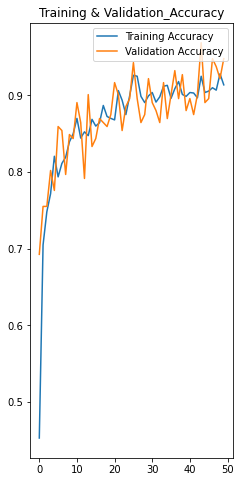

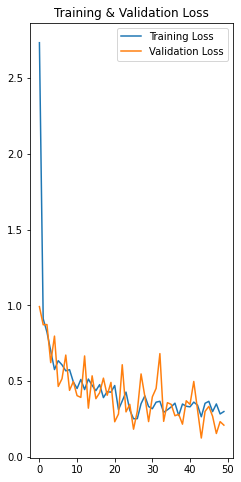

In [ ]:
EPOCHS=50
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc, label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label='Validation Accuracy')
plt.legend(loc='upper right')
plt.title("Training & Validation_Accuracy")

plt.figure(figsize=(8,8))
plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss, label='Training Loss')
plt.plot(range(EPOCHS),val_loss,label='Validation Loss')
plt.legend(loc='upper right')
plt.title("Training & Validation Loss")
plt.show()

# **Saving the Best Model**

In [ ]:
model.save('apple_potato_tomato.tf')


#**Making Prediction**

## **Prediction Function to get Class Name & Confidence**

---



---



In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 16ms/step


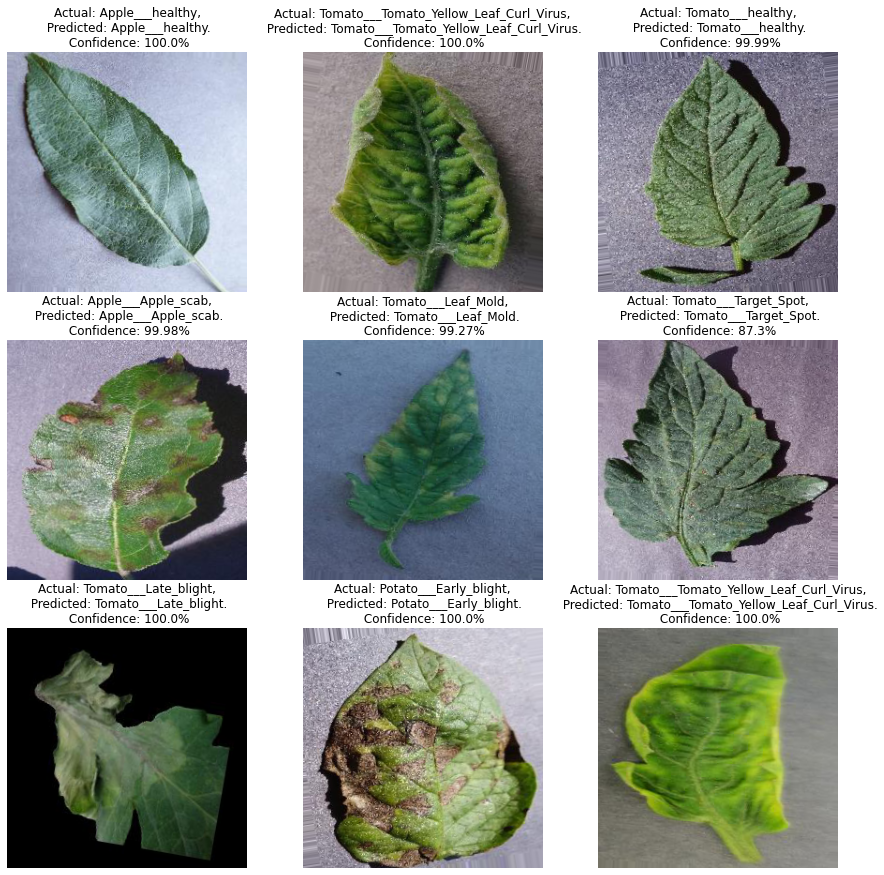

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])

        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")
    break